# Pandasデータフレーム入門

## 1. 基本事項

必要なパッケージをインポートする。

In [1]:
# import pandas

import pandas as pd

## 2. シリーズの作成

### 2.1 リストからの作成

In [2]:
# 要素数 5 のシリーズを作成して表示する

score = pd.Series([60, 70, 75, 80, 90])
score

0    60
1    70
2    75
3    80
4    90
dtype: int64

### 2.2 インデックスの基本

In [3]:
# インデックス番号 0 の要素を取得

score[0]

60

In [4]:
# インデックス番号 1-2 の要素を抽出

score[1:3]  # 3 は含まない

1    70
2    75
dtype: int64

In [5]:
# データのみを抽出

print(score.values)
list(score.values)

[60 70 75 80 90]


[60, 70, 75, 80, 90]

In [6]:
# インデックスのみを抽出

print(score.index)
list(score.index)

RangeIndex(start=0, stop=5, step=1)


[0, 1, 2, 3, 4]

### 2.3 インデックサ loc の使用

In [7]:
# インデックス番号 0 の要素を取得

score.loc[0]

60

In [8]:
# インデックス番号 1-3 の要素を抽出

score.loc[1:3]  # 3 を含む

1    70
2    75
3    80
dtype: int64

### 2.4 内容検索

In [9]:
# 値が 70 の要素の抽出

score.loc[score == 70]

1    70
dtype: int64

In [10]:
# 値が 80 以上の要素の抽出

score.loc[score >= 80]

3    80
4    90
dtype: int64

## 3. シリーズの各種演算

### 3.1 統計情報

In [11]:
# 各種統計情報を取得

score.describe()

count     5.00000
mean     75.00000
std      11.18034
min      60.00000
25%      70.00000
50%      75.00000
75%      80.00000
max      90.00000
dtype: float64

In [12]:
# 平均値, 標本分散を計算

score.mean(), score.std(ddof=0)

(75.0, 10.0)

### 3.2 ベクトル計算

In [13]:
# 各要素の平均値との差分を求める

average = score.mean()
diff = score - average
diff

0   -15.0
1    -5.0
2     0.0
3     5.0
4    15.0
dtype: float64

In [14]:
# 各要素から平均値との差分を引く（平均値にする）

score - diff

0    75.0
1    75.0
2    75.0
3    75.0
4    75.0
dtype: float64

## 4. データフレームの作成

### 4.1 リストからの作成

In [15]:
# データのみを与えてデータフレームを作成

score1 = pd.DataFrame([["Anna", 70, 90], ["Betty", 80, 85], ["Carol", 90, 80]])
score1

,0,1,2
0,Anna,70,90
1,Betty,80,85
2,Carol,90,80


In [16]:
# カラム名を追加

score1.columns=["name", "eng", "math"]
score1

,name,eng,math
0,Anna,70,90
1,Betty,80,85
2,Carol,90,80


### 4.2 シリーズからの作成

In [17]:
# 使用するシリーズ

s1 = pd.Series(["Anna", "Betty", "carol"], name="name")
s2 = pd.Series([70, 80, 90], name="eng")
s3 = pd.Series([90, 85, 80], name="math")

# データフレームへの変換

score2 = pd.concat([s1, s2, s3], axis=1)
score2

,name,eng,math
0,Anna,70,90
1,Betty,80,85
2,carol,90,80


### 4.3 インデックスの基本

In [18]:
# 列を選択する（単一列指定）

score2.name

0     Anna
1    Betty
2    carol
Name: name, dtype: object

In [19]:
# 列を選択する（複数列指定）

score2[["eng", "math"]]

,eng,math
0,70,90
1,80,85
2,90,80


In [20]:
# 行を選択する（行番号直接指定）
# 列指定と混同しやすいため非推奨

score2[1:2]  # 2 は含まない

,name,eng,math
1,Betty,80,85


In [21]:
# 行を選択する（locの使用）

score2.loc[1:2]  # 2 は含む

,name,eng,math
1,Betty,80,85
2,carol,90,80


In [22]:
# 行と列を選択する

score2.loc[1:2][["name", "math"]]

,name,math
1,Betty,85
2,carol,80


## 5 ファイルの入出力

### 5.1 CSVファイルの入力

入力ファイルの内容

In [23]:
# CSVファイルからの入力

curr = pd.read_csv("currency.csv")
curr.head()  # 先頭5件を出力

,Month,USD,EUR
0,2015-01,119.67,144.90
1,2015-02,117.45,132.65
2,2015-03,119.55,134.37
3,2015-04,120.10,128.53
4,2015-05,119.37,134.83


In [24]:
curr.tail()  # 末尾5件を出力

,Month,USD,EUR
25,2017-02,112.79,122.24
26,2017-03,112.76,120.23
27,2017-04,111.38,118.17
28,2017-05,111.29,121.95
29,2017-06,110.75,125.15


### 5.2 CSVファイルの出力

In [25]:
# CSVファイルへの出力

curr.to_csv("outfile.csv")

出力ファイルの内容

## 6.データフレームの各種演算

### 6.1 統計情報

In [26]:
# 行数と列数の表示

curr.shape

(30, 3)

In [27]:
# 各種統計情報を取得

curr.describe()

,USD,EUR
count,30.000000,30.000000
mean,114.683333,126.586667
std,7.003264,8.258059
min,101.620000,113.820000
25%,110.885000,121.032500
50%,115.675000,126.095000
75%,120.250000,133.587500
max,124.100000,144.900000


In [28]:
# 最大値を表示

curr.max()

Month    2017-06
USD        124.1
EUR        144.9
dtype: object

### 6.2 ベクトル計算

In [29]:
# 2つの列の比を求める

curr["EUR/USD"] = curr.EUR / curr.USD
curr.head()

,Month,USD,EUR,EUR/USD
0,2015-01,119.67,144.90,1.210830
1,2015-02,117.45,132.65,1.129417
2,2015-03,119.55,134.37,1.123965
3,2015-04,120.10,128.53,1.070192
4,2015-05,119.37,134.83,1.129513


In [30]:
# 前の行との差分を求める

shift1 = curr.shift(1)  # 1 行ずらす
curr["USD_diff"] = curr.USD - shift1.USD  # 差を求める
curr["EUR_diff"] = curr.EUR - shift1.EUR  # 差を求める
curr.head()

,Month,USD,EUR,EUR/USD,USD_diff,EUR_diff
0,2015-01,119.67,144.90,1.210830,NaN,NaN
1,2015-02,117.45,132.65,1.129417,-2.22,-12.25
2,2015-03,119.55,134.37,1.123965,2.10,1.72
3,2015-04,120.10,128.53,1.070192,0.55,-5.84
4,2015-05,119.37,134.83,1.129513,-0.73,6.30


## 7. グラフの作成

In [31]:
# import pandas

%matplotlib inline
import matplotlib.pyplot as plt

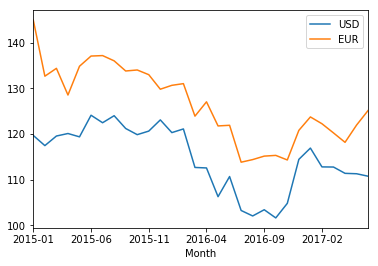

In [32]:
# 最初の2列を折れ線グラフ化

curr2 = curr[["Month", "USD", "EUR"]]
curr2.plot(x="Month")

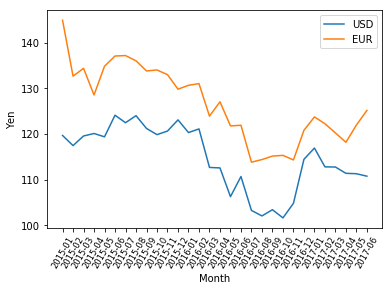

In [33]:
# Matplotlib で折れ線グラフ化

plt.plot(curr2.USD)
plt.plot(curr2.EUR)
plt.ylabel("Yen")
plt.xticks(curr2.index, curr2.Month, rotation=60, fontsize='small')
plt.xlabel("Month")
plt.legend()
plt.show()

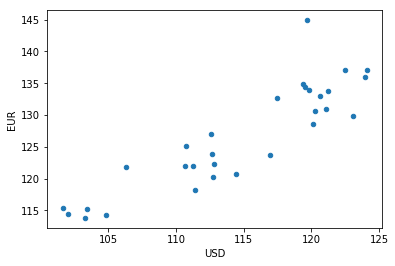

In [34]:
# 散布図の作成

curr2.plot(kind="scatter", x="USD", y="EUR")

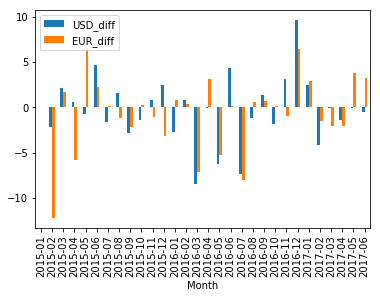

In [35]:
# 最後の2列を折れ線グラフ化

curr3 = curr[["Month", "USD_diff", "EUR_diff"]]
curr3.plot(kind='bar', x="Month")